In [1]:
using JLD

INFO: Recompiling stale cache file /Users/rawlik/.julia/lib/v0.6/JLD.ji for module JLD.


In [2]:
include("AxionMC.jl")
include("AxionPlotting.jl")

INFO: Recompiling stale cache file /Users/rawlik/.julia/lib/v0.6/ProgressMeter.ji for module ProgressMeter.
INFO: Recompiling stale cache file /Users/rawlik/.julia/lib/v0.6/DataFrames.ji for module DataFrames.
INFO: Recompiling stale cache file /Users/rawlik/.julia/lib/v0.6/PyCall.ji for module PyCall.
INFO: Recompiling stale cache file /Users/rawlik/.julia/lib/v0.6/PyPlot.ji for module PyPlot.


exclusionreportplot (generic function with 1 method)

In [3]:
brighten(color, v) = matplotlib[:colors][:to_rgb](color) .^ (1 - v)

brighten (generic function with 1 method)

Stacktrace:
 [1] depwarn(::String, ::Symbol) at ./deprecated.jl:70
 [2] zero_arg_matrix_constructor(::String) at ./deprecated.jl:1274
 [3] Type at ./deprecated.jl:1277 [inlined]
 [4] (::Core.#kw#Type)(::Array{Any,1}, ::Type{AxionSim}) at ./<missing>:0
 [5] include_string(::String, ::String) at ./loading.jl:522
 [6] include_string(::Module, ::String, ::String) at /Users/rawlik/.julia/v0.6/Compat/src/Compat.jl:174
 [7] execute_request(::ZMQ.Socket, ::IJulia.Msg) at /Users/rawlik/.julia/v0.6/IJulia/src/execute_request.jl:158
 [8] (::Compat.#inner#17{Array{Any,1},IJulia.#execute_request,Tuple{ZMQ.Socket,IJulia.Msg}})() at /Users/rawlik/.julia/v0.6/Compat/src/Compat.jl:488
 [9] eventloop(::ZMQ.Socket) at /Users/rawlik/.julia/v0.6/IJulia/src/eventloop.jl:8
 [10] (::IJulia.##14#17)() at ./task.jl:335
while loading In[4], in expression starting on line 4


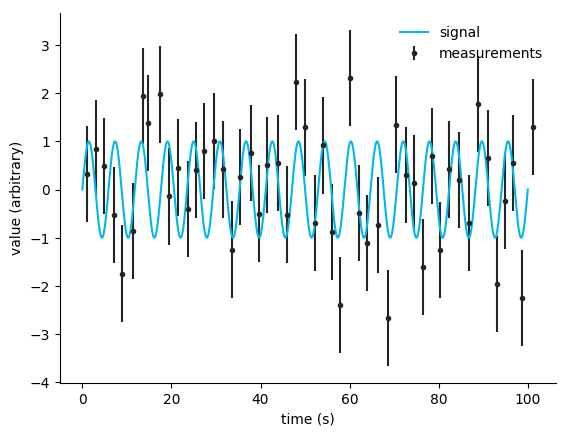

In [4]:
# seed the random number generator
srand(1)

as = AxionSim(
    cyclelength = 2SECOND,
    runlengths = 50ones(Int, 1),
    sR = 1,
    startrandomization = 0.2SECOND)


realA = 1
realf = 0.17
R = mcR(as, realA, realf, 0, 0)

plott = linspace(0, 100, 1000)
plot(plott, realA .* sin.(2π * realf .* plott), color = "C2", label = "signal")
errorbar(as.mt, R, yerr = as.sR, fmt = ".", color = "C0", label = "measurements")
xlabel("time (s)")
ylabel("value (arbitrary)")
legend()

savefig("../gfx/axions/basic_signal.pdf")

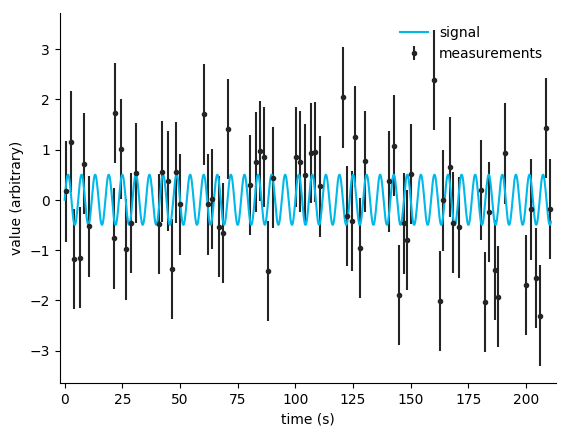

In [75]:
# seed the random number generator
srand(1)

startt = vcat([ t .+ float.(0:2:10) for t in float.(0:20:200) ]...)
startt .+= randn(length(startt)) * 0.3
endt = startt + 1
endt .+= randn(length(startt)) * 0.1

as = AxionSim(
    ct = CycleTimes(startt, endt),
    runlengths = length(startt) * ones(Int, 1),
    sR = 1)


realA = 0.5
realf = 0.17
R = mcR(as, realA, realf, 0, 0)

plott = linspace(0, maximum(as.ct.t), 1000)
plot(plott, realA .* sin.(2π * realf .* plott), color = "C2", label = "signal")
errorbar(as.mt, R, yerr = as.sR, fmt = ".", color = "C0", label = "measurements")
xlabel("time (s)")
ylabel("value (arbitrary)")
legend()

margins(x = 0.01)

savefig("../gfx/axions/basic_signal.pdf")

In [6]:
cleverfrequencies(as)

0.004746593026809439:0.004746593026809439:0.30852854674261354

In [63]:
# freqs = cleverfrequencies(as)

freqs = (0 : 0.005 : 1)[2:end]

irealf = searchsortedfirst(freqs, realf)

34

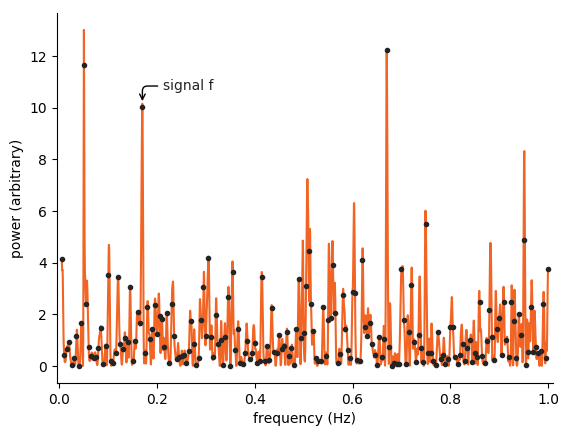

In [79]:
densefreqs = logspace(log10.(extrema(freqs))..., 10000)

p = periodogramLSSA(freqs, as, R)

plot(densefreqs, periodogramLSSA(densefreqs, as, R), color = "C6", label = "dense periodogram")
plot(freqs, p, ".", label = "original periodogram")

annotate("signal f", color = "C0",
         xy=(realf, 1.01 * p[searchsortedfirst(freqs, realf)]), xycoords="data",
         xytext=(15, 10), textcoords="offset points",
         horizontalalignment = "left",
         arrowprops = Dict("arrowstyle" => "->",
                           "connectionstyle" => "angle,angleA=0,angleB=90,rad=5"))

# axvline(realf)
# axvline(2realf)
# axvline(3realf)
# axvline(4realf)

xlabel("frequency (Hz)")
ylabel("power (arbitrary)")

margins(x = 0.01)

# legend()

# ylim(ymax = 0.155)

savefig("../gfx/axions/basic_periodogram.pdf")

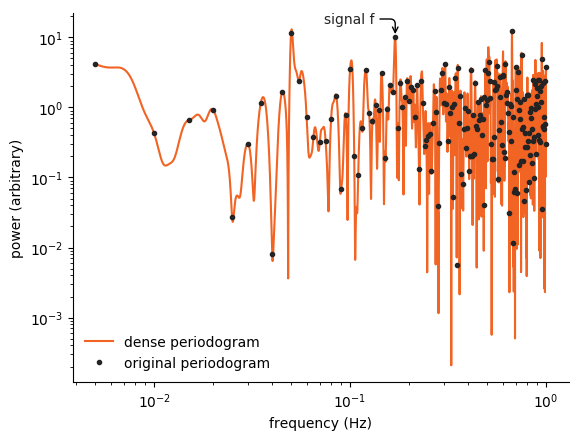

In [9]:
densefreqs = logspace(log10.(extrema(freqs))..., 10000)

p = periodogramLSSA(freqs, as, R)

plot(densefreqs, periodogramLSSA(densefreqs, as, R), color = "C6", label = "dense periodogram")
plot(freqs, p, ".", label = "original periodogram")

annotate("signal f", color = "C0",
         xy=(realf, 1.01 * p[irealf]), xycoords="data",
         xytext=(-15, 10), textcoords="offset points",
         horizontalalignment = "right",
         arrowprops = Dict("arrowstyle" => "->",
                           "connectionstyle" => "angle,angleA=0,angleB=90,rad=5"))

# axvline(realf)
# axvline(2realf)
# axvline(3realf)
# axvline(4realf)

xlabel("frequency (Hz)")
ylabel("power (arbitrary)")

xscale("log")
yscale("log")

legend()

savefig("../gfx/axions/basic_periodogram_loglog.pdf")

# ylim(ymax = 0.155)

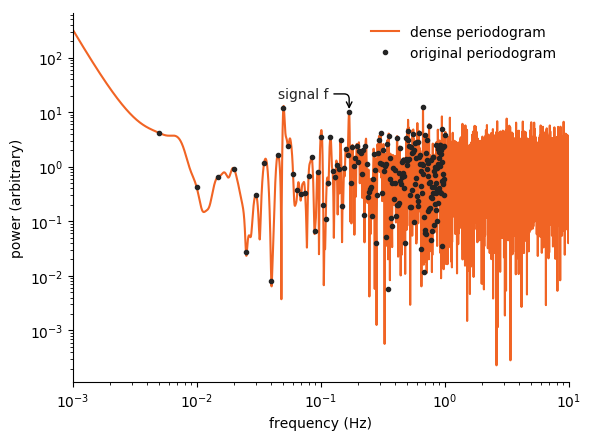

In [81]:
# densefreqs = logspace(log10.(extrema(freqs))..., 10000)
densefreqs = logspace(-3, 1, 10000)

p = periodogramLSSA(freqs, as, R)

plot(densefreqs, periodogramLSSA(densefreqs, as, R), color = "C6", label = "dense periodogram")
plot(freqs, p, ".", label = "original periodogram")

annotate("signal f", color = "C0",
         xy=(realf, 1.01 * p[irealf]), xycoords="data",
         xytext=(-15, 10), textcoords="offset points",
         horizontalalignment = "right",
         arrowprops = Dict("arrowstyle" => "->",
                           "connectionstyle" => "angle,angleA=0,angleB=90,rad=5"))

# axvline(realf)
# axvline(2realf)
# axvline(3realf)
# axvline(4realf)

xlabel("frequency (Hz)")
ylabel("power (arbitrary)")

xscale("log")
yscale("log")

margins(x = 0)

legend()

savefig("../gfx/axions/basic_periodogram_loglog.pdf")

# ylim(ymax = 0.155)

In [416]:
nullperiodograms = mcperiodograms(as, freqs, 0, realf, mcmultiplicity = 10000, fitoffsets = false, simjumpsize = 0)

Progress: 100%|█████████████████████████████████████████| Time: 0:03:04


200×10000 Array{Float64,2}:
 2.4115      3.01895    1.11785     …  1.29375     1.34774   0.793722 
 0.80468     4.89469    1.5292         1.65645     0.186433  4.68103  
 0.290149    0.177592   0.551365       1.82463     1.044     2.92786  
 1.18069     0.216803   0.0948471      0.458254    0.169663  1.6399   
 0.0511064   0.152372   1.68176        1.44783     1.86183   2.32157  
 0.814145    1.21172    0.0243727   …  3.85312     1.99204   1.28681  
 1.61912     0.07674    0.256169       1.5897      0.646703  1.30974  
 0.234188    5.46298    1.37845        0.205711    0.193319  0.228263 
 0.982101    6.68723    0.446101       4.70787     2.2546    0.209181 
 3.17817     2.29413    0.180703       2.85376     4.51523   0.0517076
 0.638849    5.54596    0.547947    …  0.117946    0.262535  0.282264 
 0.203206    0.454239   2.85902        1.47912     0.175266  3.0549   
 0.184545    0.491794   0.308755       0.445113    0.96601   0.215761 
 ⋮                                  ⋱            

In [417]:
@save "nullperiodograms.jld" nullperiodograms

In [10]:
@load "nullperiodograms.jld" nullperiodograms

1-element Array{Symbol,1}:
 :nullperiodograms

In [12]:
confidencelevels = erf.((1:3) ./ √2)
pups = map(cl -> mapslices(d -> quantile(d, cl), nullperiodograms, 2) |> vec, confidencelevels)
pdowns = map(cl -> mapslices(d -> quantile(d, 1 - cl), nullperiodograms, 2) |> vec, confidencelevels)

3-element Array{Array{Float64,1},1}:
 [0.371566, 0.378491, 0.387888, 0.374302, 0.441545, 0.379901, 0.37679, 0.380962, 0.37306, 0.648196  …  0.388845, 0.384635, 0.372119, 0.390365, 0.412358, 0.385914, 0.386011, 0.399884, 0.385721, 0.384111]                                          
 [0.0457636, 0.0444288, 0.0477339, 0.0479821, 0.0524095, 0.0441903, 0.04381, 0.0459544, 0.043052, 0.0782456  …  0.0466352, 0.0453745, 0.0478296, 0.0475118, 0.0521826, 0.050702, 0.0475128, 0.0519741, 0.0474691, 0.0480171]                        
 [0.00317953, 0.00261294, 0.00309916, 0.00351455, 0.00229747, 0.00235875, 0.00292013, 0.00230123, 0.00192994, 0.00348599  …  0.00281974, 0.00336037, 0.00189421, 0.00297534, 0.00306089, 0.00336965, 0.00326966, 0.00353431, 0.00222179, 0.00305853]

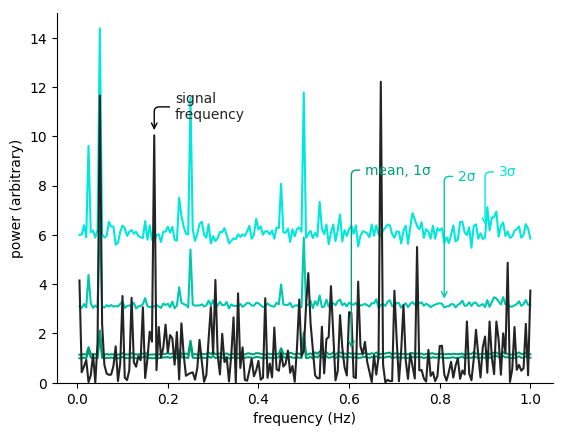

In [13]:
plot(freqs, mean(nullperiodograms, 2), color = "C3")
plot(freqs, pups[1], color = "C3")
plot(freqs, pups[2], color = brighten("C3", 0.5))
plot(freqs, pups[3], color = brighten("C3", 0.8))

plot(freqs, p)

annotate("signal\nfrequency", color = "C0",
         xy=(realf, 1.01 * p[irealf]), xycoords="data",
         xytext=(15, 10), textcoords="offset points",
         horizontalalignment = "left",
         arrowprops = Dict("arrowstyle" => "->",
                           "connectionstyle" => "angle,angleA=180,angleB=90,rad=5"))




annotate("3σ", color = brighten("C3", 0.8),
         xy=(0.9, 6.3), xycoords="data",
         xytext=(10, 40), textcoords="offset points",
         horizontalalignment = "left",
         verticalalignment = "center",
         arrowprops = Dict("arrowstyle" => "->",
                           "connectionstyle" => "angle,angleA=0,angleB=90,rad=5",
                           "color" => brighten("C3", 0.8)))

annotate("2σ", color = brighten("C3", 0.5),
         xy=(0.81, 3.3), xycoords="data",
         xytext=(10, 90), textcoords="offset points",
         horizontalalignment = "left",
         verticalalignment = "center",
         arrowprops = Dict("arrowstyle" => "->",
                           "connectionstyle" => "angle,angleA=0,angleB=90,rad=5",
                           "color" => brighten("C3", 0.5)))

annotate("mean, 1σ", color = brighten("C3", 0),
         xy=(0.605, 1.3), xycoords="data",
         xytext=(10, 130), textcoords="offset points",
         horizontalalignment = "left",
         verticalalignment = "center",
         arrowprops = Dict("arrowstyle" => "->",
                           "connectionstyle" => "angle,angleA=0,angleB=90,rad=5",
                           "color" => brighten("C3", 0)))


# yscale("log")
# xscale("log")
xlabel("frequency (Hz)")
ylabel("power (arbitrary)")

ylim(0, 15)

savefig("../gfx/axions/basic_detection.pdf")

In [14]:
function findleastprobable(nullperiodograms)
    [ nullperiodograms[ findmax(sum(nullperiodograms[:,i] .> nullperiodograms, 2))[2], i]
    for i in 1:size(nullperiodograms, 2) ]
end

findleastprobable (generic function with 1 method)

In [15]:
leastprobablepowers = findleastprobable(nullperiodograms)

10000-element Array{Float64,1}:
 4.52309
 7.13833
 5.03513
 6.59557
 3.92001
 3.12433
 5.09235
 8.30862
 3.5538 
 4.24732
 5.53113
 6.10525
 6.32463
 ⋮      
 9.48975
 5.17488
 6.8829 
 7.54237
 3.99535
 4.96425
 5.64864
 8.14287
 6.30663
 6.70453
 8.68909
 4.68103

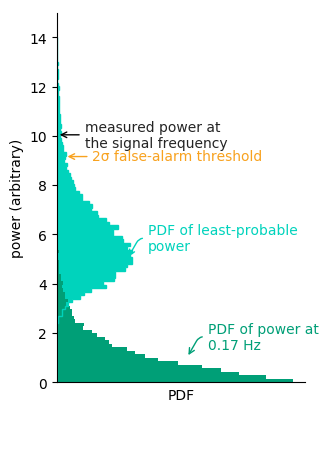

In [16]:
figure(figsize=(6.4 / 2, 4.8))

mybins = linspace(0, 14, 100)

plt[:hist](leastprobablepowers, orientation = "horizontal", color = brighten("C3", 0.6), bins = mybins, normed = true)

plt[:hist](nullperiodograms[irealf, :], orientation = "horizontal", color = "C3", bins = mybins, normed = true)

# just to get the line on top
plt[:hist](leastprobablepowers, orientation = "horizontal", color = brighten("C3", 0.6), bins = mybins, normed = true,
histtype = "step")


annotate("measured power at\nthe signal frequency", color = "C0",
         xy=(0, p[irealf]), xycoords="data",
         xytext=(20, 0), textcoords="offset points",
         horizontalalignment = "left",
         verticalalignment = "center",
         arrowprops = Dict("arrowstyle" => "->",
                           "connectionstyle" => "arc,angleB=0,armB=20,rad=5"))

annotate("PDF of power at\n$realf Hz", color = "C3",
         xy=(0.5, 1), xycoords="data",
         xytext=(15, 15), textcoords="offset points",
         horizontalalignment = "left",
         verticalalignment = "center",
         arrowprops = Dict("arrowstyle" => "->",
                           "connectionstyle" => "angle,angleA=0,angleB=60,rad=5",
                           "color" => "C3"))


annotate("PDF of least-probable\npower", color = brighten("C3", 0.6),
         xy=(0.27, 5), xycoords="data",
         xytext=(15, 15), textcoords="offset points",
         horizontalalignment = "left",
         verticalalignment = "center",
         arrowprops = Dict("arrowstyle" => "->",
                           "connectionstyle" => "angle,angleA=0,angleB=60,rad=5",
                           "color" => brighten("C3", 0.6)))

annotate("2σ false-alarm threshold", color = "C1",
         xy=(0.03, quantile(leastprobablepowers, confidencelevels[2])), xycoords="data",
         xytext=(20, 0), textcoords="offset points",
         horizontalalignment = "left",
         verticalalignment = "center",
         arrowprops = Dict("arrowstyle" => "->",
                           "connectionstyle" => "arc,angleB=0,armB=20,rad=5",
                           "color" => "C1"))

annotate("3σ false-alarm threshold", color = "C1",
         xy=(0.03, quantile(leastprobablepowers, confidencelevels[3])), xycoords="data",
         xytext=(20, 0), textcoords="offset points",
         horizontalalignment = "left",
         verticalalignment = "center",
         arrowprops = Dict("arrowstyle" => "->",
                           "connectionstyle" => "arc,angleB=0,armB=20,rad=5",
                           "color" => "C1"))



ylabel("power (arbitrary)")
xlabel("PDF")

xticks([])

ylim(0, 15)

savefig("../gfx/axions/basic_detection_histogram.pdf")

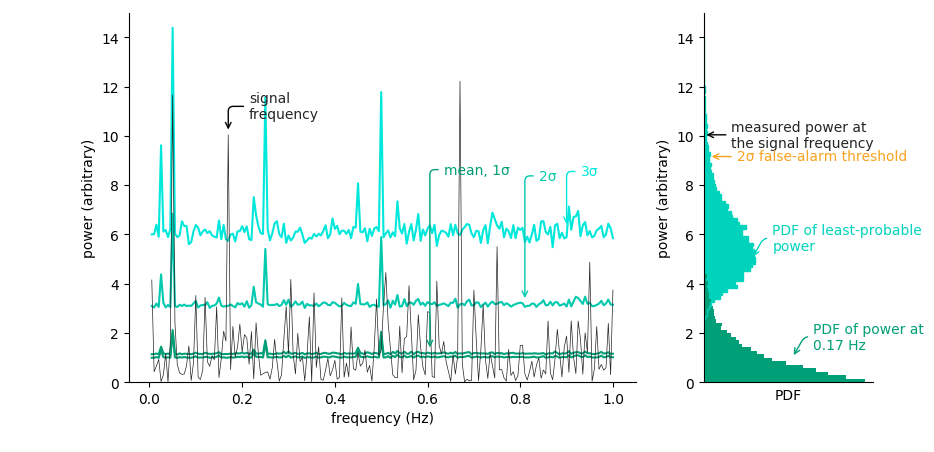

In [17]:
fig, axs = subplots(1, 2, gridspec_kw = Dict("width_ratios" => [3, 1]), figsize=(6.4 * 1.5, 4.8))



sca(axs[1])
plot(freqs, mean(nullperiodograms, 2), color = "C3")
plot(freqs, pups[1], color = "C3")
plot(freqs, pups[2], color = brighten("C3", 0.5))
plot(freqs, pups[3], color = brighten("C3", 0.8))

plot(freqs, p, lw = 0.5)

annotate("signal\nfrequency", color = "C0",
         xy=(realf, 1.01 * p[irealf]), xycoords="data",
         xytext=(15, 10), textcoords="offset points",
         horizontalalignment = "left",
         arrowprops = Dict("arrowstyle" => "->",
                           "connectionstyle" => "angle,angleA=180,angleB=90,rad=5"))




annotate("3σ", color = brighten("C3", 0.8),
         xy=(0.9, 6.3), xycoords="data",
         xytext=(10, 40), textcoords="offset points",
         horizontalalignment = "left",
         verticalalignment = "center",
         arrowprops = Dict("arrowstyle" => "->",
                           "connectionstyle" => "angle,angleA=0,angleB=90,rad=5",
                           "color" => brighten("C3", 0.8)))

annotate("2σ", color = brighten("C3", 0.5),
         xy=(0.81, 3.3), xycoords="data",
         xytext=(10, 90), textcoords="offset points",
         horizontalalignment = "left",
         verticalalignment = "center",
         arrowprops = Dict("arrowstyle" => "->",
                           "connectionstyle" => "angle,angleA=0,angleB=90,rad=5",
                           "color" => brighten("C3", 0.5)))

annotate("mean, 1σ", color = brighten("C3", 0),
         xy=(0.605, 1.3), xycoords="data",
         xytext=(10, 130), textcoords="offset points",
         horizontalalignment = "left",
         verticalalignment = "center",
         arrowprops = Dict("arrowstyle" => "->",
                           "connectionstyle" => "angle,angleA=0,angleB=90,rad=5",
                           "color" => brighten("C3", 0)))


# yscale("log")
# xscale("log")
xlabel("frequency (Hz)")
ylabel("power (arbitrary)")

ylim(0, 15)
# yscale("log")




sca(axs[2])

mybins = linspace(0, 14, 100)

plt[:hist](leastprobablepowers, orientation = "horizontal", color = brighten("C3", 0.6), bins = mybins, normed = true)

plt[:hist](nullperiodograms[irealf, :], orientation = "horizontal", color = "C3", bins = mybins, normed = true)

# just to get the line on top
plt[:hist](leastprobablepowers, orientation = "horizontal", color = brighten("C3", 0.6), bins = mybins, normed = true,
histtype = "step")


annotate("measured power at\nthe signal frequency", color = "C0",
         xy=(0, p[irealf]), xycoords="data",
         xytext=(20, 0), textcoords="offset points",
         horizontalalignment = "left",
         verticalalignment = "center",
         arrowprops = Dict("arrowstyle" => "->",
                           "connectionstyle" => "arc,angleB=0,armB=20,rad=5"))

annotate("PDF of power at\n$realf Hz", color = "C3",
         xy=(0.5, 1), xycoords="data",
         xytext=(15, 15), textcoords="offset points",
         horizontalalignment = "left",
         verticalalignment = "center",
         arrowprops = Dict("arrowstyle" => "->",
                           "connectionstyle" => "angle,angleA=0,angleB=60,rad=5",
                           "color" => "C3"))


annotate("PDF of least-probable\npower", color = brighten("C3", 0.6),
         xy=(0.27, 5), xycoords="data",
         xytext=(15, 15), textcoords="offset points",
         horizontalalignment = "left",
         verticalalignment = "center",
         arrowprops = Dict("arrowstyle" => "->",
                           "connectionstyle" => "angle,angleA=0,angleB=60,rad=5",
                           "color" => brighten("C3", 0.6)))

annotate("2σ false-alarm threshold", color = "C1",
         xy=(0.03, quantile(leastprobablepowers, confidencelevels[2])), xycoords="data",
         xytext=(20, 0), textcoords="offset points",
         horizontalalignment = "left",
         verticalalignment = "center",
         arrowprops = Dict("arrowstyle" => "->",
                           "connectionstyle" => "arc,angleB=0,armB=20,rad=5",
                           "color" => "C1"))

annotate("3σ false-alarm threshold", color = "C1",
         xy=(0.03, quantile(leastprobablepowers, confidencelevels[3])), xycoords="data",
         xytext=(20, 0), textcoords="offset points",
         horizontalalignment = "left",
         verticalalignment = "center",
         arrowprops = Dict("arrowstyle" => "->",
                           "connectionstyle" => "arc,angleB=0,armB=20,rad=5",
                           "color" => "C1"))



ylabel("power (arbitrary)")
xlabel("PDF")

xticks([])

ylim(0, 15)
# yscale("log")

savefig("../gfx/axions/basic_detection.pdf")

In [137]:
exclampls = logspace(-1, 1, 50)
exclfreqs = logspace(-3, 1, 50)

signalperiodograms = mcsignalpowers(as, exclfreqs, exclampls,
    mcmultiplicity = 100, fitoffsets = false, simjumpsize = 0)

exclnullperiodograms = mcperiodograms(as, exclfreqs, 0, realf, mcmultiplicity = 10000,
    fitoffsets = false, simjumpsize = 0)

frequency 0.001, amplitude 0.1
frequency 0.0012067926406393288, amplitude 0.1
frequency 0.0014563484775012444, amplitude 0.1
frequency 0.0017575106248547913, amplitude 0.1
frequency 0.0021209508879201904, amplitude 0.1
frequency 0.002559547922699536, amplitude 0.1
frequency 0.0030888435964774815, amplitude 0.1
frequency 0.0037275937203149418, amplitude 0.1
frequency 0.004498432668969444, amplitude 0.1
frequency 0.005428675439323859, amplitude 0.1
frequency 0.006551285568595509, amplitude 0.1
frequency 0.0079060432109077, amplitude 0.1
frequency 0.009540954763499945, amplitude 0.1
frequency 0.011513953993264475, amplitude 0.1
frequency 0.013894954943731374, amplitude 0.1
frequency 0.016768329368110083, amplitude 0.1
frequency 0.020235896477251564, amplitude 0.1
frequency 0.02442053094548651, amplitude 0.1
frequency 0.029470517025518114, amplitude 0.1
frequency 0.03556480306223129, amplitude 0.1
frequency 0.04291934260128778, amplitude 0.1
frequency 0.0517947467923121, amplitude 0.1
freq

Progress: 100%|█████████████████████████████████████████| Time: 0:00:40


50×10000 Array{Float64,2}:
 203.373     16.9313     7.01254    …  31.0419    17.6238    51.2937   
  98.285      8.07818    3.49985       15.7228     8.83581   25.6384   
  48.0418     3.87293    1.79086        8.18676    4.55508   13.1494   
  23.8797     1.86862    0.949367       4.41689    2.44524    6.99498  
  12.171      0.908443   0.528905       2.48755    1.39213    3.91593  
   6.44887    0.444763   0.31583    …   1.46727    0.863447   2.34984  
   3.64819    0.217694   0.2081         0.89817    0.607162   1.54164  
   2.34857    0.103239   0.160123       0.55781    0.513674   1.11665  
   1.98153    0.0413829  0.168824       0.449924   0.564461   0.875567 
   2.1117     0.0073102  0.293187       1.16447    0.821279   0.873747 
   1.28305    0.0801081  0.495046   …   2.33902    1.40187    1.56745  
   1.24396    0.480478   0.409854       1.87526    1.48065    1.84172  
   2.43841    0.412532   0.0551687      0.496677   0.563845   1.36564  
   ⋮                                ⋱

In [138]:
CLmap = exclusionreport(as, R, exclfreqs, exclampls, exclnullperiodograms, signalperiodograms, fitoffsets = false)
CLmap_noCLs = exclusionreport(as, R, exclfreqs, exclampls, exclnullperiodograms, signalperiodograms, fitoffsets = false,
    useCLsmethod = false)

50×50 Array{Float64,2}:
 0.01  0.03  0.03  0.02  0.01  0.02  …  0.93  0.96  0.99  1.0   1.0   1.0 
 0.01  0.0   0.0   0.03  0.02  0.01     1.0   1.0   1.0   1.0   1.0   1.0 
 0.02  0.0   0.0   0.01  0.01  0.01     1.0   1.0   1.0   1.0   1.0   1.0 
 0.03  0.0   0.03  0.01  0.01  0.01     1.0   1.0   1.0   1.0   1.0   1.0 
 0.01  0.01  0.02  0.01  0.02  0.05     1.0   1.0   1.0   1.0   1.0   1.0 
 0.0   0.03  0.02  0.02  0.01  0.02  …  1.0   1.0   1.0   1.0   1.0   1.0 
 0.02  0.01  0.02  0.01  0.01  0.0      1.0   1.0   1.0   1.0   1.0   1.0 
 0.0   0.0   0.0   0.0   0.02  0.03     1.0   1.0   1.0   1.0   1.0   1.0 
 0.01  0.01  0.04  0.04  0.01  0.04     1.0   1.0   1.0   1.0   1.0   1.0 
 0.03  0.06  0.06  0.06  0.1   0.11     1.0   1.0   1.0   1.0   1.0   1.0 
 0.08  0.05  0.03  0.06  0.09  0.06  …  1.0   1.0   1.0   1.0   1.0   1.0 
 0.2   0.24  0.2   0.21  0.16  0.22     1.0   1.0   1.0   1.0   1.0   1.0 
 0.61  0.66  0.63  0.59  0.66  0.72     1.0   1.0   1.0   1.0   1.0   1.0 
 

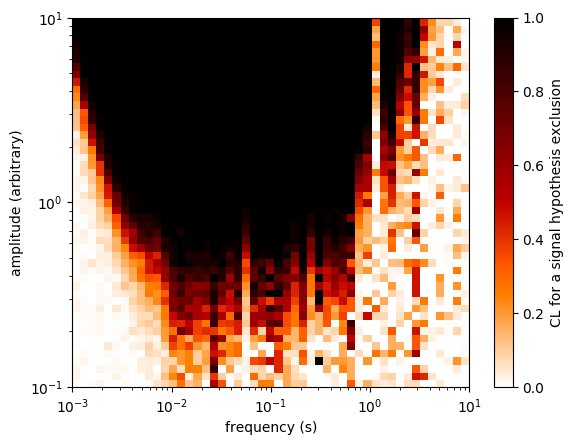

In [139]:
# boundsgrid(a) = logspace(extrema(log10(a))..., length(a) + 1)
pcol = pcolormesh(exclfreqs, exclampls, CLmap',
           vmax=1, vmin=0, cmap="gist_heat_r", rasterized = true) #linewidth = 0)
# pcol[:set_edgecolor](:face) # ref. https://stackoverflow.com/questions/27092991/white-lines-in-matplotlibs-pcolor#27096694
colorbar(label="CL for a signal hypothesis exclusion")
xscale("log")
xlabel("frequency (s)")
yscale("log")
ylabel("amplitude (arbitrary)")

gca()[:spines]["top"][:set_visible](true)
gca()[:spines]["right"][:set_visible](true)

savefig("../gfx/axions/basic_exclusion.pdf")

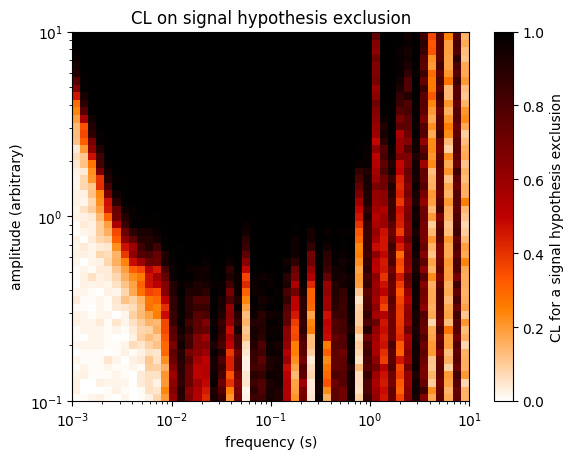

In [159]:
# boundsgrid(a) = logspace(extrema(log10(a))..., length(a) + 1)
pcol = pcolormesh(exclfreqs, exclampls, CLmap_noCLs',
           vmax=1, vmin=0, cmap="gist_heat_r", rasterized = true) #linewidth = 0)
# pcol[:set_edgecolor](:face)
colorbar(label="CL for a signal hypothesis exclusion")
xscale("log")
xlabel("frequency (s)")
yscale("log")
ylabel("amplitude (arbitrary)")
title("CL on signal hypothesis exclusion")

gca()[:spines]["top"][:set_visible](true)
gca()[:spines]["right"][:set_visible](true)

savefig("../gfx/axions/basic_exclusion_noCls.pdf")

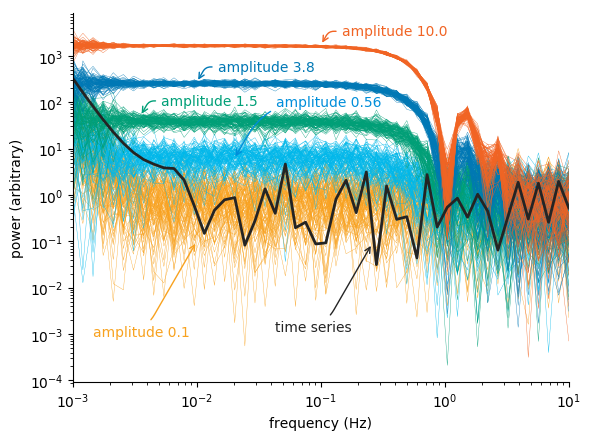

In [170]:
mycolors = ["C1", "C2", "C3", "C5", "C6"]

for (mycolor, i) in zip(mycolors, [1, 10, 15, 20, 25] .* 50 .÷ 25 )
    plot(exclfreqs, signalperiodograms[:, i, 1], lw = 0.25, color = mycolor, label = "amplitude $(signif(exclampls[i], 2))")
    for j in 2:100
        plot(exclfreqs, signalperiodograms[:, i, j], lw = 0.25, color = mycolor)
    end
end
# plot(exclfreqs, signalperiodograms[:, 10], lw = 1, color = "C2")
# plot(exclfreqs, signalperiodograms[:, 15], lw = 1, color = "C3")
# plot(exclfreqs, signalperiodograms[:, 25], lw = 2, color = "C4")

plot(exclfreqs, periodogramLSSA(exclfreqs, as, R), lw = 2, color = "C0", label = "time series")


annotate("amplitude 10.0", color = mycolors[5],
         xy=(1e-1, 1.7e3), xycoords="data",
         xytext=(15, 10), textcoords="offset points",
         horizontalalignment = "left",
         verticalalignment = "center",
         arrowprops = Dict("arrowstyle" => "->",
                           "connectionstyle" => "angle,angleA=0,angleB=60,rad=5",
                           "color" => mycolors[5]))

annotate("amplitude 3.8", color = mycolors[4],
         xy=(1e-2, 2.7e2), xycoords="data",
         xytext=(15, 11), textcoords="offset points",
         horizontalalignment = "left",
         verticalalignment = "center",
         arrowprops = Dict("arrowstyle" => "->",
                           "connectionstyle" => "angle,angleA=0,angleB=60,rad=5",
                           "color" => mycolors[4]))

annotate("amplitude 1.5", color = mycolors[3],
         xy=(3.5e-3, 5e1), xycoords="data",
         xytext=(15, 11), textcoords="offset points",
         horizontalalignment = "left",
         verticalalignment = "center",
         arrowprops = Dict("arrowstyle" => "->",
                           "connectionstyle" => "angle,angleA=0,angleB=60,rad=5",
                           "color" => mycolors[3]))

annotate("amplitude 0.56", color = brighten(mycolors[2], -0.8),
         xy=(2e-2, 6e0), xycoords="data",
         xytext=(30, 41), textcoords="offset points",
         horizontalalignment = "left",
         verticalalignment = "center",
         arrowprops = Dict("arrowstyle" => "->",
                           "connectionstyle" => "angle,angleA=0,angleB=60,rad=40",
                           "color" => brighten(mycolors[2], -0.8)))


annotate("amplitude 0.1", color = mycolors[1],
         xy=(1e-2, 1e-1), xycoords="data",
         xytext=(-5, -65), textcoords="offset points",
         horizontalalignment = "right",
         verticalalignment = "center",
         arrowprops = Dict("arrowstyle" => "->",
                           "connectionstyle" => "angle,angleA=180,angleB=-120,rad=20",
                           "color" => mycolors[1]))

annotate("time series", color = "C0",
         xy=(2.6e-1, 0.9e-1), xycoords="data",
         xytext=(-15, -60), textcoords="offset points",
         horizontalalignment = "right",
         verticalalignment = "center",
         arrowprops = Dict("arrowstyle" => "->",
                           "connectionstyle" => "angle,angleA=180,angleB=-120,rad=20",
                           "color" => "C0"))


# legend(fontsize = "small", ncol = 3)

xlabel("frequency (Hz)")
ylabel("power (arbitrary)")

margins(x = 0)

xscale("log")
yscale("log")

savefig("../gfx/axions/basic_exclusion_sensitivity.pdf")

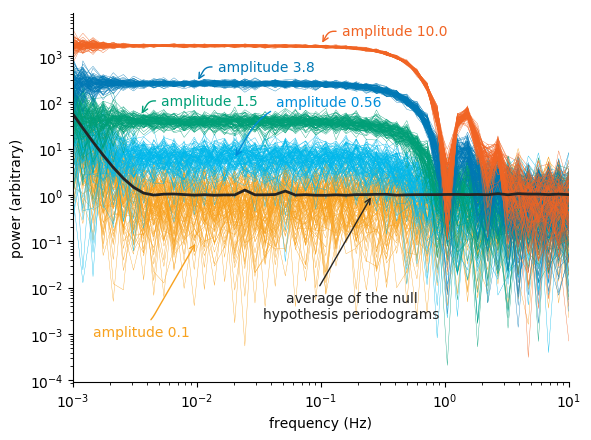

In [169]:
mycolors = ["C1", "C2", "C3", "C5", "C6"]

for (mycolor, i) in zip(mycolors, [1, 10, 15, 20, 25] .* 50 .÷ 25 )
    plot(exclfreqs, signalperiodograms[:, i, 1], lw = 0.25, color = mycolor, label = "amplitude $(signif(exclampls[i], 2))")
    for j in 2:100
        plot(exclfreqs, signalperiodograms[:, i, j], lw = 0.25, color = mycolor)
    end
end
# plot(exclfreqs, signalperiodograms[:, 10], lw = 1, color = "C2")
# plot(exclfreqs, signalperiodograms[:, 15], lw = 1, color = "C3")
# plot(exclfreqs, signalperiodograms[:, 25], lw = 2, color = "C4")

# plot(exclfreqs, periodogramLSSA(exclfreqs, as, R), lw = 2, color = "C0", label = "time series")
plot(exclfreqs, mean(exclnullperiodograms, 2), lw = 2, color = "C0", label = "time series")


annotate("amplitude 10.0", color = mycolors[5],
         xy=(1e-1, 1.7e3), xycoords="data",
         xytext=(15, 10), textcoords="offset points",
         horizontalalignment = "left",
         verticalalignment = "center",
         arrowprops = Dict("arrowstyle" => "->",
                           "connectionstyle" => "angle,angleA=0,angleB=60,rad=5",
                           "color" => mycolors[5]))

annotate("amplitude 3.8", color = mycolors[4],
         xy=(1e-2, 2.7e2), xycoords="data",
         xytext=(15, 11), textcoords="offset points",
         horizontalalignment = "left",
         verticalalignment = "center",
         arrowprops = Dict("arrowstyle" => "->",
                           "connectionstyle" => "angle,angleA=0,angleB=60,rad=5",
                           "color" => mycolors[4]))

annotate("amplitude 1.5", color = mycolors[3],
         xy=(3.5e-3, 5e1), xycoords="data",
         xytext=(15, 11), textcoords="offset points",
         horizontalalignment = "left",
         verticalalignment = "center",
         arrowprops = Dict("arrowstyle" => "->",
                           "connectionstyle" => "angle,angleA=0,angleB=60,rad=5",
                           "color" => mycolors[3]))

annotate("amplitude 0.56", color = brighten(mycolors[2], -0.8),
         xy=(2e-2, 6e0), xycoords="data",
         xytext=(30, 41), textcoords="offset points",
         horizontalalignment = "left",
         verticalalignment = "center",
         arrowprops = Dict("arrowstyle" => "->",
                           "connectionstyle" => "angle,angleA=0,angleB=60,rad=40",
                           "color" => brighten(mycolors[2], -0.8)))


annotate("amplitude 0.1", color = mycolors[1],
         xy=(1e-2, 1e-1), xycoords="data",
         xytext=(-5, -65), textcoords="offset points",
         horizontalalignment = "right",
         verticalalignment = "center",
         arrowprops = Dict("arrowstyle" => "->",
                           "connectionstyle" => "angle,angleA=180,angleB=-120,rad=20",
                           "color" => mycolors[1]))

annotate("average of the null\nhypothesis periodograms", color = "C0",
         xy=(2.6e-1, 1), xycoords="data",
         xytext=(-15, -80), textcoords="offset points",
         horizontalalignment = "center",
         verticalalignment = "center",
         arrowprops = Dict("arrowstyle" => "->",
                           "connectionstyle" => "angle,angleA=180,angleB=-120,rad=20",
                           "color" => "C0"))


# legend(fontsize = "small", ncol = 3)

xlabel("frequency (Hz)")
ylabel("power (arbitrary)")

margins(x = 0)

xscale("log")
yscale("log")

# savefig("../gfx/axions/basic_exclusion_sensitivity.pdf")